# 1. Import datasets

In [2]:
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')## Load test features to predict on
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')## Load y train (true labels)
y_test = pd.read_csv('world_happiness_competition_data/y_test.csv')## Load y test (true labels)
y_train_labels = y_train.idxmax(axis=1) ## Examine what this does and write in next cell
y_test_labels = y_test.idxmax(axis=1)## Complete in a similar manner as above

X_train.head()

Country or region  GDP per capita  Social support  Healthy life expectancy  \
0            Latvia           1.187           1.465                    0.812   
1           Burundi           0.046           0.447                    0.380   
2           Belarus           1.067           1.465                    0.789   
3           Liberia           0.073           0.922                    0.443   
4           Ecuador           0.912           1.312                    0.868   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.264       0.075                      0.064   
1                         0.220       0.176                      0.180   
2                         0.235       0.094                      0.142   
3                         0.370       0.233                      0.033   
4                         0.498       0.126                      0.087   

      name    region                       sub-region  Terrorist_attacks  
0   Latvia    Europe                  Northern Europe         125.611111  
1  Burundi    Africa               Sub-Saharan Africa         155.000000  
2  Belarus    Europe                   Eastern Europe           4.000000  
3  Liberia    Africa               Sub-Saharan Africa        1419.095238  
4  Ecuador  Americas  Latin America and the Caribbean           5.000000

In [3]:
countrydata=pd.read_csv("newcountryvars.csv")

countrydata.head()

country_name  population  population_below_poverty_line       hdi  \
0        India  1339180127                           21.9  0.623559   
1      Nigeria   190886311                           70.0  0.527105   
2       Mexico   129163276                           46.2  0.761683   
3     Pakistan   197015955                           29.5  0.550354   
4   Bangladesh   164669751                           31.5  0.578824   

   life_expectancy  expected_years_of_schooling  mean_years_of_schooling  \
0           68.322                    11.696590                 6.298834   
1           53.057                     9.970482                 6.000000   
2           76.972                    13.299090                 8.554985   
3           66.365                     8.106910                 5.089460   
4           71.985                    10.178706                 5.241577   

            gni  
0   5663.474799  
1   5442.901264  
2  16383.106680  
3   5031.173074  
4   3341.490722

In [4]:
X_train = pd.merge(X_train, countrydata, left_on='Country or region', right_on='country_name', how='left')## Complete code
X_test = pd.merge(X_test, countrydata, left_on='Country or region', right_on='country_name', how='left')## Complete code

In [5]:
X_train.head(1)

Country or region  GDP per capita  Social support  Healthy life expectancy  \
0            Latvia           1.187           1.465                    0.812   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.264       0.075                      0.064   

     name  region       sub-region  Terrorist_attacks country_name  \
0  Latvia  Europe  Northern Europe         125.611111       Latvia   

   population  population_below_poverty_line       hdi  life_expectancy  \
0   1949670.0                           25.5  0.829862           74.342   

   expected_years_of_schooling  mean_years_of_schooling          gni  
0                     15.97411                11.736418  22589.17355

# 2. Exploratory Data Analysis

In [6]:
num_missing_values = X_train.isnull().sum()
missing_percentage = (X_train.isnull().sum() / len(X_train)) * 100

missing_data = pd.DataFrame({
    'Missing Values': num_missing_values,
    'Percentage': missing_percentage
})

display(missing_data)

Missing Values  Percentage
Country or region                           0    0.000000
GDP per capita                              0    0.000000
Social support                              0    0.000000
Healthy life expectancy                     0    0.000000
Freedom to make life choices                0    0.000000
Generosity                                  0    0.000000
Perceptions of corruption                   0    0.000000
name                                        0    0.000000
region                                      0    0.000000
sub-region                                  0    0.000000
Terrorist_attacks                           0    0.000000
country_name                                6    8.695652
population                                  6    8.695652
population_below_poverty_line              11   15.942029
hdi                                         6    8.695652
life_expectancy                             6    8.695652
expected_years_of_schooling                 6    8.695652
mean_years_of_schooling                     6    8.695652
gni                                         6    8.695652

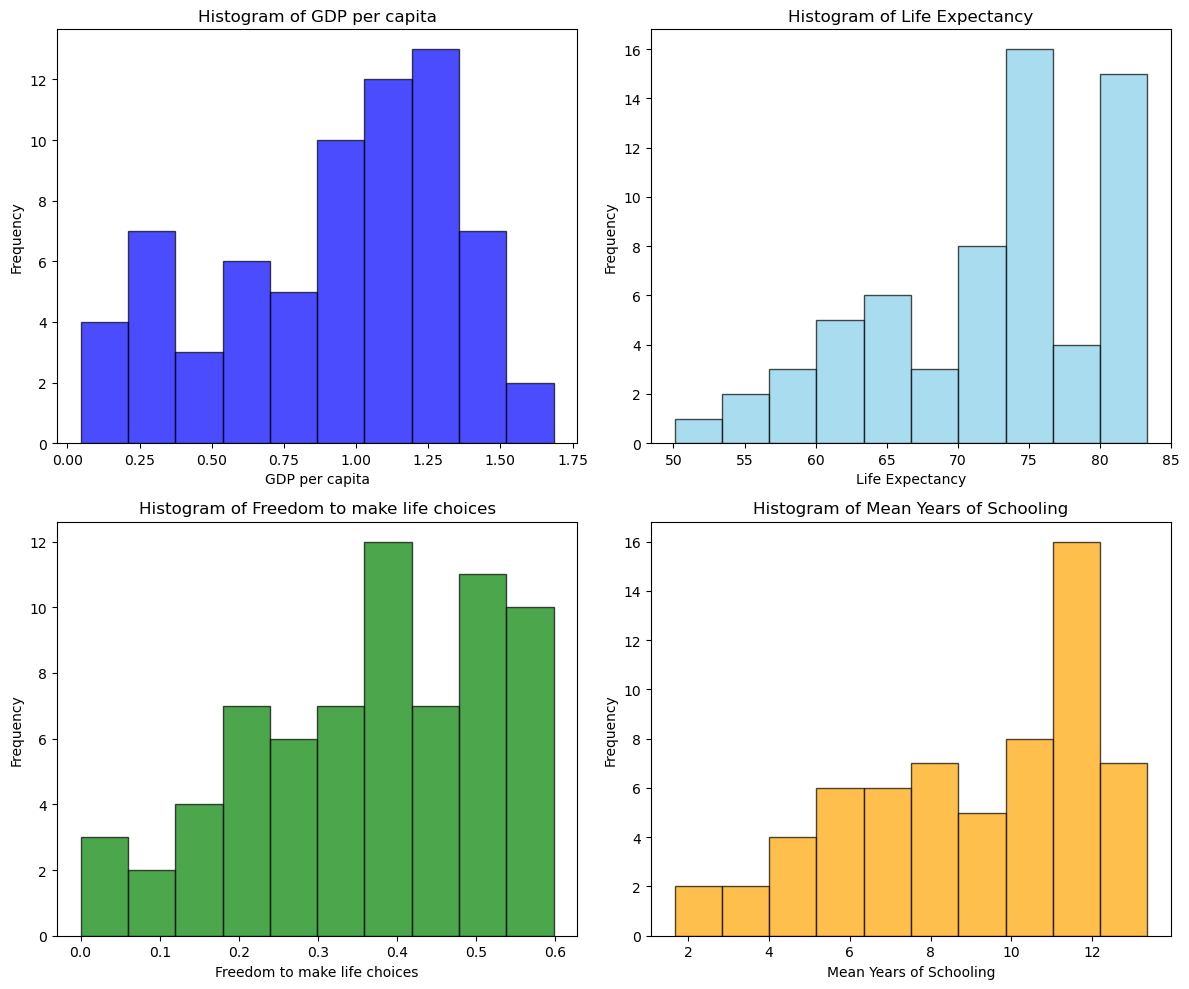

In [7]:
# I chose to plot the distribution of 'gdp per capita', distribution of 'life_expectancy', 
# distribution of 'Freedom to make life choices', and distribution of 'Mean Years of Schooling'. 

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Assuming X_train is your DataFrame and it is already defined.
plot_data_1 = X_train["GDP per capita"]
plot_data_2 = X_train["life_expectancy"]
plot_data_3 = X_train["Freedom to make life choices"]
plot_data_4 = X_train["mean_years_of_schooling"]

# Create a figure with 2x2 subplots
figure, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot histogram for GDP per capita
axs[0, 0].hist(plot_data_1, bins=10, color='blue', edgecolor='black', alpha=0.7)
axs[0, 0].set_title('Histogram of GDP per capita')
axs[0, 0].set_xlabel('GDP per capita')
axs[0, 0].set_ylabel('Frequency')

# Plot histogram for Life Expectancy
axs[0, 1].hist(plot_data_2, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
axs[0, 1].set_title('Histogram of Life Expectancy')
axs[0, 1].set_xlabel('Life Expectancy')
axs[0, 1].set_ylabel('Frequency')

# Plot histogram for Freedom to make life choices
axs[1, 0].hist(plot_data_3, bins=10, color='green', edgecolor='black', alpha=0.7)
axs[1, 0].set_title('Histogram of Freedom to make life choices')
axs[1, 0].set_xlabel('Freedom to make life choices')
axs[1, 0].set_ylabel('Frequency')

# Plot histogram for Mean Years of Schooling
axs[1, 1].hist(plot_data_4, bins=10, color='orange', edgecolor='black', alpha=0.7)
axs[1, 1].set_title('Histogram of Mean Years of Schooling')
axs[1, 1].set_xlabel('Mean Years of Schooling')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

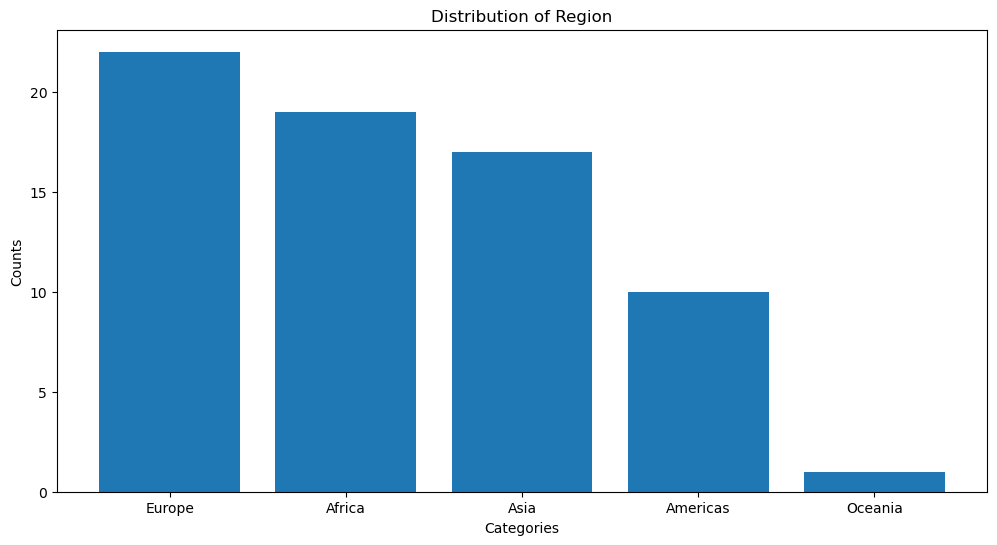

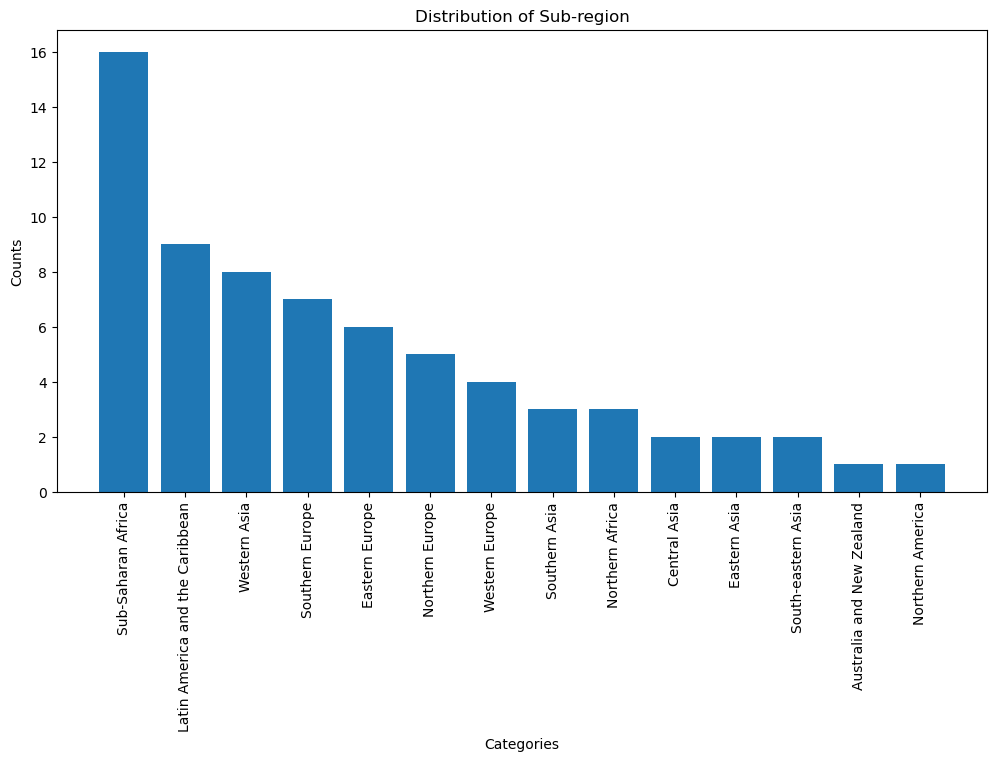

In [8]:
# I chose to plot the distribution of categorical variable "region" and 'sub_region'.

region_category_counts = X_train['region'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(region_category_counts.index, region_category_counts.values)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Distribution of Region')
plt.show()

sub_region_category_counts = X_train['sub-region'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(sub_region_category_counts.index, sub_region_category_counts.values)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Distribution of Sub-region')
plt.xticks(rotation=90)
plt.show()

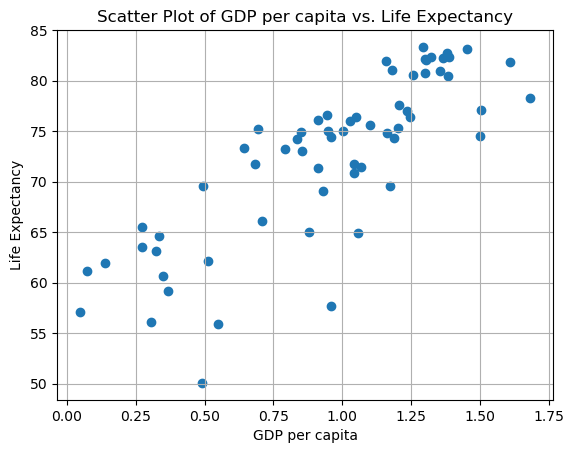

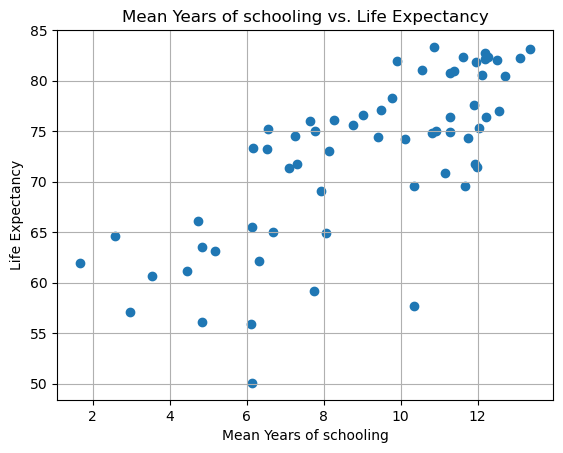

In [9]:
# I chose to explore the relationship between 'gdp per capita' and 'life_expectancy', as well as the relationship 
# between 'mean_years_of_schooling' and 'life_expectancy'.

# From the scatter plots, we observe that both 'GDP per capita' and 'mean years of schooling' have a positive 
# relationship with 'life expectancy'.


plt.scatter(X_train['GDP per capita'], X_train['life_expectancy'])
plt.xlabel('GDP per capita')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot of GDP per capita vs. Life Expectancy')
plt.grid()
plt.show()

plt.scatter(X_train['mean_years_of_schooling'], X_train['life_expectancy'])
plt.xlabel('Mean Years of schooling')
plt.ylabel('Life Expectancy')
plt.title('Mean Years of schooling vs. Life Expectancy')
plt.grid()
plt.show()

In [10]:
# Correlation table
# From the correlation table, almost all attributes show a positive correlation with 'life_expectancy','except for 
# 'Generosity,' 'Terrorist_attacks,' and 'population_below_poverty_line'.

correlation_matrix = X_train.corr()
display(correlation_matrix)

/var/folders/xl/1l26f1zs64vcyrn4b8yynjl00000gn/T/ipykernel_60128/1675485758.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X_train.corr()


GDP per capita  Social support  \
GDP per capita                       1.000000        0.776994   
Social support                       0.776994        1.000000   
Healthy life expectancy              0.828855        0.732568   
Freedom to make life choices         0.497536        0.588616   
Generosity                          -0.087230       -0.058026   
Perceptions of corruption            0.376035        0.290184   
Terrorist_attacks                   -0.359662       -0.445112   
population                           0.010983       -0.078932   
population_below_poverty_line       -0.783629       -0.671441   
hdi                                  0.952534        0.829772   
life_expectancy                      0.819725        0.713381   
expected_years_of_schooling          0.816278        0.763511   
mean_years_of_schooling              0.806770        0.794848   
gni                                  0.791134        0.501397   

                               Healthy life expectancy  \
GDP per capita                                0.828855   
Social support                                0.732568   
Healthy life expectancy                       1.000000   
Freedom to make life choices                  0.424599   
Generosity                                   -0.017666   
Perceptions of corruption                     0.379915   
Terrorist_attacks                            -0.402194   
population                                    0.056740   
population_below_poverty_line                -0.698012   
hdi                                           0.919899   
life_expectancy                               0.982990   
expected_years_of_schooling                   0.837451   
mean_years_of_schooling                       0.795686   
gni                                           0.570419   

                               Freedom to make life choices  Generosity  \
GDP per capita                                     0.497536   -0.087230   
Social support                                     0.588616   -0.058026   
Healthy life expectancy                            0.424599   -0.017666   
Freedom to make life choices                       1.000000    0.302245   
Generosity                                         0.302245    1.000000   
Perceptions of corruption                          0.493557    0.274878   
Terrorist_attacks                                 -0.381656    0.027501   
population                                         0.111773   -0.075887   
population_below_poverty_line                     -0.405978    0.069264   
hdi                                                0.428954   -0.123773   
life_expectancy                                    0.392675   -0.017838   
expected_years_of_schooling                        0.356783   -0.141452   
mean_years_of_schooling                            0.346807   -0.147592   
gni                                                0.457114    0.031449   

                               Perceptions of corruption  Terrorist_attacks  \
GDP per capita                                  0.376035          -0.359662   
Social support                                  0.290184          -0.445112   
Healthy life expectancy                         0.379915          -0.402194   
Freedom to make life choices                    0.493557          -0.381656   
Generosity                                      0.274878           0.027501   
Perceptions of corruption                       1.000000          -0.172918   
Terrorist_attacks                              -0.172918           1.000000   
population                                     -0.053192          -0.033408   
population_below_poverty_line                  -0.216316           0.271698   
hdi                                             0.367459          -0.362150   
life_expectancy                                 0.361583          -0.346591   
expected_years_of_schooling                     0.319262          -0.258710   
mean_years_of_schooling        

I observed that 'Generosity,' 'Terrorist_attacks,' and 'population_below_poverty_line' have negative relationship with 'life_expectancy'.This makes sense, as an increase in terrorist attacks and the proportion of poor people in a country is likely to result in a decrease in life expectancy in that country. To my surprise, 'Generosity' shows a negative correlation with 'life_expectancy'. Some countries may be overly generous in ways that lead to unsustainable economic practices, which negatively impact living conditions.

I observed that as GDP per capita increases, life expectancy also improves. Additionally, as the number of years of schooling increases, life expectancy tends to rise as well. These observations suggest that improving both economic conditions and educational access can enhance public health outcomes.

# 3. Preprocess data using a Pipeline

In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.select_dtypes(include=['number'])## Drop all the non-numerical features from X_train
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='constant', fill_value=0)), ## Is this good enough?
    ('imputer', SimpleImputer(strategy='median')), ## I change the fill_value from zero to median.
    ('scaler', StandardScaler())]) # You will need to describe why this is being done in the next cell

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer',  SimpleImputer(strategy='most_frequent' )),
    ('onehot', OneHotEncoder(handle_unknown= 'ignore'  ))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

In [12]:
def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

# 4. Fit the Keras model on the preprocessed data and save the preprocessor function along with the Keras model.

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

feature_count= preprocessor(X_train).shape[1]#count features in input data

keras_model = Sequential() ## Define a Neural Network Model with 5 layers 128->64->64->32->(?)
keras_model.add(Dense(128, activation='relu', input_dim=feature_count))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))
#Use Softmax activation in last layer. How many neurons should there be in the last layer?
#The y_train includes 5 columns, so 5 neurons should be in the output layer.
keras_model.add(Dense(5, activation='softmax'))
sgd = SGD(learning_rate=0.0001)

# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
history = keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20,
               epochs = 300, validation_split=0.25)

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

2024-10-07 15:10:36.946507: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/anyuchen/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.0963 - loss: 1.6580 - val_accuracy: 0.2222 - val_loss: 1.6047
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1151 - loss: 1.6439 - val_accuracy: 0.2778 - val_loss: 1.5986
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1338 - loss: 1.6333 - val_accuracy: 0.2778 - val_loss: 1.5927
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1186 - loss: 1.6410 - val_accuracy: 0.2778 - val_loss: 1.5876
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1436 - loss: 1.6189 - val_accuracy: 0.3333 - val_loss: 1.5828
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1632 - loss: 1.6144 - val_accuracy: 0.3333 - val_loss: 1.5779
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1543 - loss: 1.6145 - val_accuracy: 0.3333 - val_loss: 1.5721
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1989 - loss: 1.6111 - val_accuracy: 0.3333 - val_loss:

Epoch 52/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6262 - loss: 1.1527 - val_accuracy: 0.5556 - val_loss: 1.3429
Epoch 53/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6262 - loss: 1.1603 - val_accuracy: 0.5556 - val_loss: 1.3387
Epoch 54/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6137 - loss: 1.1675 - val_accuracy: 0.5556 - val_loss: 1.3345
Epoch 55/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6137 - loss: 1.1300 - val_accuracy: 0.5556 - val_loss: 1.3302
Epoch 56/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5887 - loss: 1.2020 - val_accuracy: 0.5556 - val_loss: 1.3265
Epoch 57/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6012 - loss: 1.1442 - val_accuracy: 0.5556 - val_loss: 1.3225
Epoch 58/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6512 - loss: 1.0705 - val_accuracy: 0.5556 - val_loss: 1.3175
Epoch 59/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6012 - loss: 1.1277 - val_accuracy: 0.5556 - v

Epoch 103/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7797 - loss: 0.8069 - val_accuracy: 0.5556 - val_loss: 1.1432
Epoch 104/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8109 - loss: 0.7648 - val_accuracy: 0.5556 - val_loss: 1.1400
Epoch 105/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7734 - loss: 0.7966 - val_accuracy: 0.5556 - val_loss: 1.1378
Epoch 106/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8234 - loss: 0.7524 - val_accuracy: 0.5556 - val_loss: 1.1368
Epoch 107/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7922 - loss: 0.7721 - val_accuracy: 0.5556 - val_loss: 1.1338
Epoch 108/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8297 - loss: 0.7243 - val_accuracy: 0.5556 - val_loss: 1.1302
Epoch 109/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8047 - loss: 0.7681 - val_accuracy: 0.5556 - val_loss: 1.1293
Epoch 110/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7922 - loss: 0.7302 - val_accuracy: 0.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8430 - loss: 0.5571 - val_accuracy: 0.5000 - val_loss: 1.0274
Epoch 154/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7993 - loss: 0.5683 - val_accuracy: 0.5000 - val_loss: 1.0290
Epoch 155/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8680 - loss: 0.4651 - val_accuracy: 0.5000 - val_loss: 1.0297
Epoch 156/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8055 - loss: 0.5449 - val_accuracy: 0.5000 - val_loss: 1.0253
Epoch 157/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8180 - loss: 0.5393 - val_accuracy: 0.5000 - val_loss: 1.0230
Epoch 158/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8055 - loss: 0.5745 - val_accuracy: 0.5000 - val_loss: 1.0224
Epoch 159/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8368 - loss: 0.5055 - val_accuracy: 0.5000 - val_loss: 1.0203
Epoch 160/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8305 - loss: 0.5485 - val_accuracy: 0.5000 - val_los

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8278 - loss: 0.4201 - val_accuracy: 0.6111 - val_loss: 0.9622
Epoch 204/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8841 - loss: 0.3683 - val_accuracy: 0.6111 - val_loss: 0.9598
Epoch 205/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8278 - loss: 0.4007 - val_accuracy: 0.6111 - val_loss: 0.9590
Epoch 206/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8528 - loss: 0.4302 - val_accuracy: 0.6111 - val_loss: 0.9582
Epoch 207/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8466 - loss: 0.3987 - val_accuracy: 0.6111 - val_loss: 0.9560
Epoch 208/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8466 - loss: 0.3820 - val_accuracy: 0.6111 - val_loss: 0.9537
Epoch 209/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8341 - loss: 0.4168 - val_accuracy: 0.6111 - val_loss: 0.9558
Epoch 210/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8153 - loss: 0.4336 - val_accuracy: 0.6111 - val_los

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8912 - loss: 0.3046 - val_accuracy: 0.6667 - val_loss: 0.9697
Epoch 254/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8849 - loss: 0.3011 - val_accuracy: 0.6667 - val_loss: 0.9707
Epoch 255/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8885 - loss: 0.3361 - val_accuracy: 0.6667 - val_loss: 0.9696
Epoch 256/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8885 - loss: 0.2920 - val_accuracy: 0.6667 - val_loss: 0.9756
Epoch 257/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9162 - loss: 0.2574 - val_accuracy: 0.6667 - val_loss: 0.9759
Epoch 258/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8787 - loss: 0.3036 - val_accuracy: 0.6667 - val_loss: 0.9770
Epoch 259/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9135 - loss: 0.2678 - val_accuracy: 0.6667 - val_loss: 0.9781
Epoch 260/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8885 - loss: 0.2964 - val_accuracy: 0.6667 - val_los

In [16]:
import numpy as np
from sklearn.metrics import classification_report
predictions = keras_model.predict(preprocessor(X_test))
prediction_column_index = np.argmax(predictions, axis=1)# Predict

# extract correct prediction labels
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

## Write code to show model performance by comparing prediction_labels with true labels
true_labels = y_test.values.argmax(axis=1)
print(classification_report(true_labels, prediction_column_index, target_names=y_train.columns))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
              precision    recall  f1-score   support

     Average       0.00      0.00      0.00         4
        High       0.50      0.40      0.44         5
         Low       0.50      0.50      0.50         4
   Very High       0.50      1.00      0.67         2
    Very Low       0.60      0.75      0.67         4

    accuracy                           0.47        19
   macro avg       0.42      0.53      0.46        19
weighted avg       0.42      0.47      0.43        19



From the classification report, the model has performed poorly overall, as indicated by the accuracy of 0.47 and the low precision and recall for certain classes (notably "Average"). While it performs reasonably well on the "Very High" and "Very Low" classes, the model struggles with other classes, particularly "Average."

# 5. Analysis of the Keras model performance and its results.

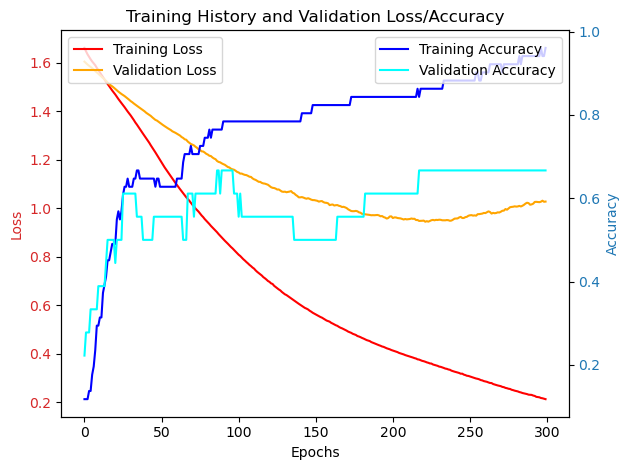

In [17]:
fig, ax1 = plt.subplots()

# Plotting the loss values
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(loss, label='Training Loss', color='red')
ax1.plot(val_loss, label='Validation Loss', color='orange')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Creating a second y-axis for accuracy
ax2 = ax1.twinx()  
ax2.set_ylabel('Accuracy', color='tab:blue')  
ax2.plot(accuracy, label='Training Accuracy', color='blue')
ax2.plot(val_accuracy, label='Validation Accuracy', color='cyan')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Training History and Validation Loss/Accuracy')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


The training history shows a consistent downward trend in the training loss, indicating that the model is effectively learning from the training data. However, a contrasting pattern is observed in the validation loss, which begins to increase toward the end of the training process. This divergence suggests that the model may be overfitting the training data.

I used the ReLU activation function in the middle layers because it effectively introduces non-linearity and is computationally efficient.The reason for using softmax in the last layer is that it is specifically designed for multi-class classification problems. Since y_train contains multiple categories, softmax allows the model to assign probabilities to each class, enabling us to identify the most likely class.


Training for 300 epochs might be excessive and is not a good idea. An epoch refers to one complete pass through the entire training dataset. As I tracked the validation loss during training, I found that around the 190th epoch, the validation loss started to increase while the training loss continued to decrease. This is a sign of overfitting, which means that the model is learning the training data too well but is failing to generalize to unseen data. Therefore, training for more epochs is unnecessary.

The loss function 'categorical_crossentropy' is commonly used in multi-class classification problems. We aim to minimize this loss during training, as it quantifies how well the predicted probabilities match the actual class labels.The optimizer 'sgd' updates the model's weights incrementally for for each training batch and helps the model converge towards the minimum loss based on the loss gradient.

/Users/anyuchen/opt/anaconda3/lib/python3.9/site-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


(33,)


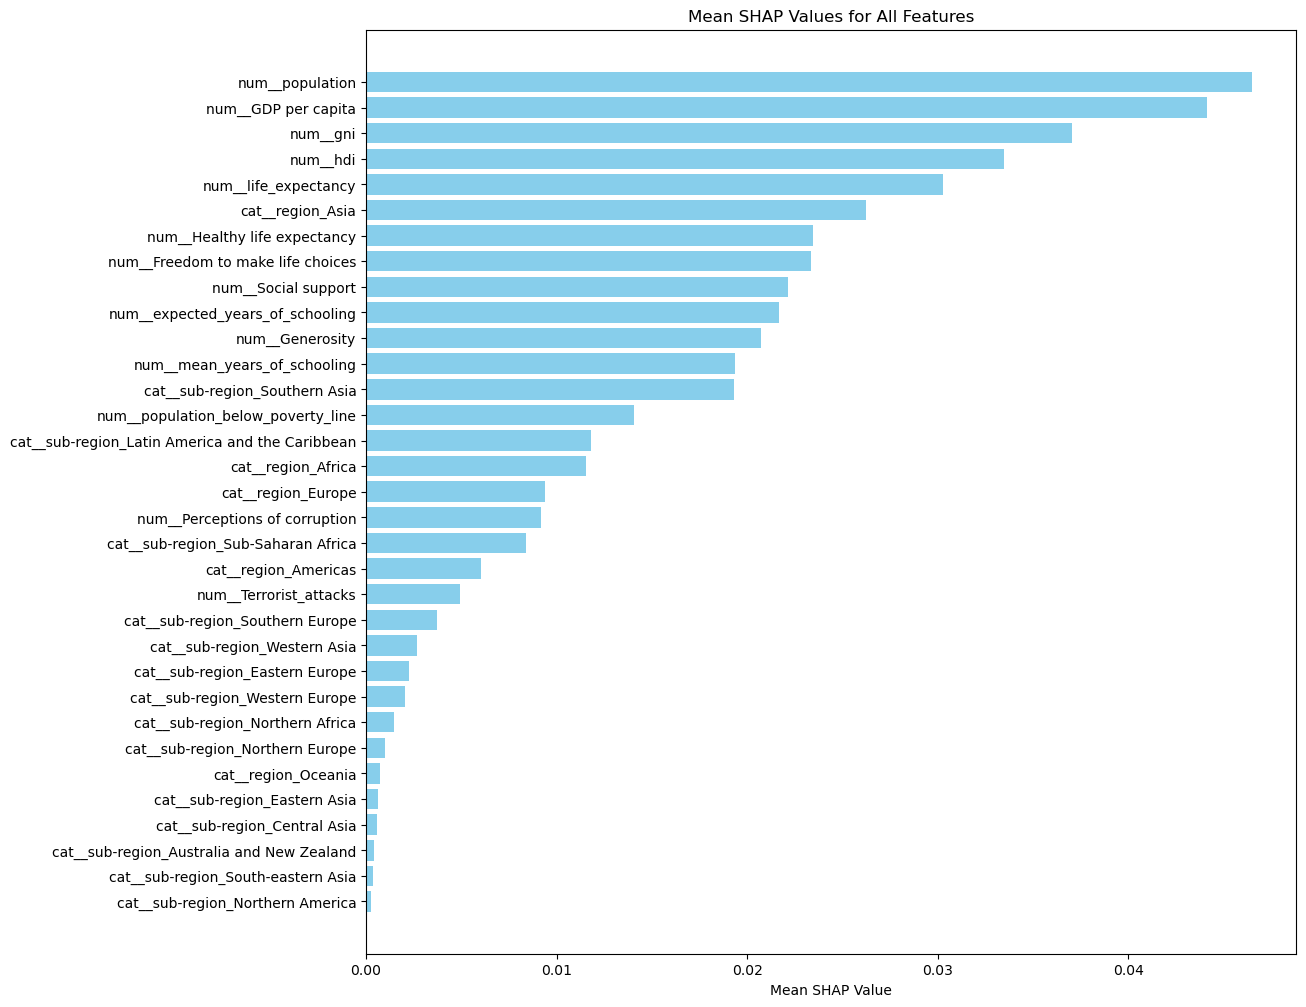

In [18]:
import shap

explainer = shap.DeepExplainer(keras_model, preprocessor(X_train))
shap_values = explainer.shap_values(preprocessor(X_test))

# Average the absolute SHAP values across all instances for each feature
shap_values_combined = shap_values[0]  # Use the first output if you have multiple outputs
mean_shap_values = np.mean(np.abs(shap_values_combined), axis=1)  # Use absolute values for better interpretation

print(mean_shap_values.shape)

# Get feature names from the preprocessor
columns = preprocess.get_feature_names_out()  # Get the feature names after transformation

# Create a DataFrame for easier plotting
shap_df = pd.DataFrame({
    'Feature': columns,
    'Mean SHAP Value': mean_shap_values
})

# Sort the DataFrame by Mean SHAP Value
shap_df = shap_df.sort_values(by='Mean SHAP Value', ascending=True)

# Plot the final bar plot
plt.figure(figsize=(12, 12))
plt.barh(shap_df['Feature'], shap_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.title('Mean SHAP Values for All Features')
plt.show()

SHAP values effectively represent the contribution of each feature to a model's predictions. For example, a mean SHAP value of 0.05 indicates that an increase in GDP per capita is associated is associated with a significant increase in predicted happiness levels. A mean SHAP value of 0.035 suggests that an increase in expected years of schooling is linked to a significant increase in predicted happiness levels. Overall, these SHAP values provide clear and insightful explanations of how my model makes decisions. However, challenges such as model complexity, feature interactions, and data quality can complicate the justification process. Therefore, I think combining SHAP values with clear illustrations of the model and features could enhances overall interpretability.